Digit Recognization using MLP

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import os
import seaborn as sn
import math
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.regularizers import l2, l1
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


In [0]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [0]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [0]:
# Save image parameters to the constants that we will use later used for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

In [0]:
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [0]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


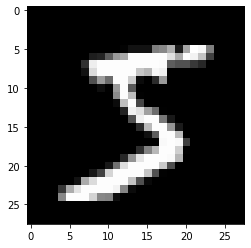

In [0]:
plt.figure(figsize=(20, 4))
plt.imshow(x_train[0])
plt.gray()
plt.show()

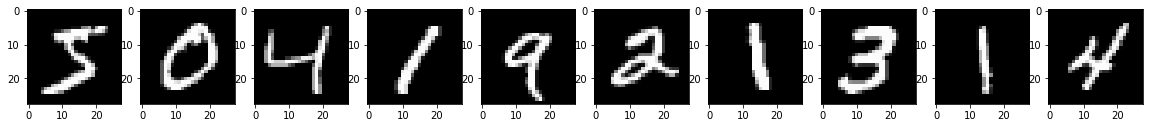

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

In [0]:
x_train_normalized=x_train/255
x_test_normalized=x_test/255

In [0]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.07,0.07,0.49,0.53,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,0.37,0.60,0.67,0.99,0.99,0.99,0.99,0.99,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,0.99,0.99,0.99,0.99,0.78,0.71,0.97,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,0.42,0.99,0.99,0.80,0.04,0.00,0.17,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


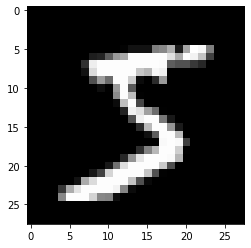

In [0]:
plt.figure(figsize=(20, 4))
plt.imshow(x_train[0])
plt.gray()
plt.show()

In [0]:
check=ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
model = Sequential()

# Input layers.
model.add(Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(Dense(128, activation='relu',
                activity_regularizer=l2(0.002)))

# Hidden layers.
model.add(Dense(128, activation='relu',
                activity_regularizer=l2(0.002)))

# Output layers.
model.add(Dense(10,activation='softmax'))


In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


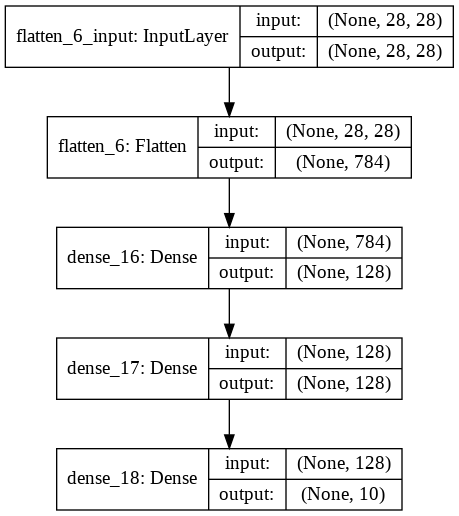

In [0]:
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)

In [0]:

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])


In [0]:


training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[check]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.6352 - accuracy: 0.9030 - val_loss: 0.3666 - val_accuracy: 0.9460
Epoch 2/10
 1760/60000 [..............................] - ETA: 5s - loss: 0.3777 - accuracy: 0.9403

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60000/60000 [==============================] - 6s 95us/step - loss: 0.3298 - accuracy: 0.9491 - val_loss: 0.3185 - val_accuracy: 0.9458
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2840 - accuracy: 0.9544 - val_loss: 0.2824 - val_accuracy: 0.9519
Epoch 4/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2653 - accuracy: 0.9571 - val_loss: 0.2965 - val_accuracy: 0.9502
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2539 - accuracy: 0.9586 - val_loss: 0.2930 - val_accuracy: 0.9437
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2460 - accuracy: 0.9594 - val_loss: 0.2782 - val_accuracy: 0.9510
Epoch 7/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2439 - accuracy: 0.9600 - val_loss: 0.2719 - val_accuracy: 0.9542
Epoch 8/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2387 - accuracy: 0.9623 - val_loss: 0.2936 - val

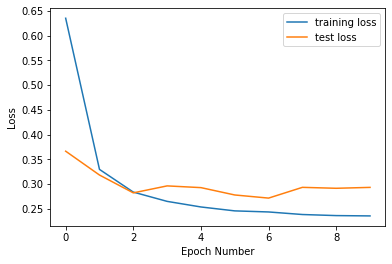

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training loss')
plt.plot(training_history.history['val_loss'], label='test loss')
plt.legend()

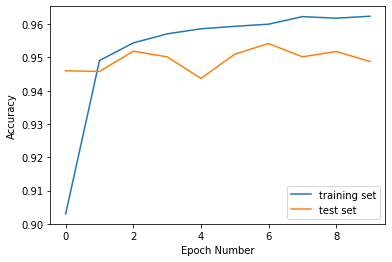

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

Predictions

In [0]:
Predictions=model.predict([x_test_normalized])

In [0]:
Predictions.shape

(10000, 10)

In [0]:
pd.DataFrame(Predictions)

,0,1,2,3,4,5,6,7,8,9
0,0.001275,0.000653,0.002568,0.002707,0.001576,0.001024,0.000592,0.984230,0.001121,0.004255
1,0.000038,0.000179,0.999216,0.000180,0.000094,0.000016,0.000060,0.000138,0.000063,0.000017
2,0.000482,0.994248,0.001178,0.000634,0.000484,0.000487,0.000430,0.000472,0.001215,0.000369
3,0.986947,0.000492,0.002066,0.000765,0.001662,0.001432,0.002163,0.001349,0.001380,0.001745
4,0.000248,0.000089,0.000184,0.000066,0.997653,0.000100,0.000575,0.000126,0.000265,0.000694
...,...,...,...,...,...,...,...,...,...,...
9995,0.000134,0.002913,0.989219,0.002132,0.000103,0.001264,0.000065,0.003925,0.000216,0.000028
9996,0.000058,0.000232,0.000925,0.995867,0.000087,0.001596,0.000032,0.000276,0.000331,0.000595
9997,0.000319,0.000650,0.000545,0.000347,0.988507,0.000443,0.000682,0.000652,0.002193,0.005663
9998,0.000006,0.000004,0.000008,0.000038,0.000004,0.999826,0.000044,0.000010,0.000045,0.000013


In [0]:
predictions_1 = np.argmax(Predictions, axis=1)
pd.DataFrame(predictions_1)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [0]:
print(predictions_1[0])

7


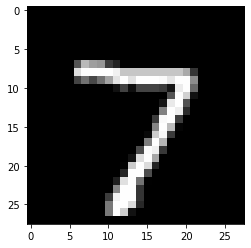

In [0]:
plt.imshow(x_test_normalized[0])
plt.show()

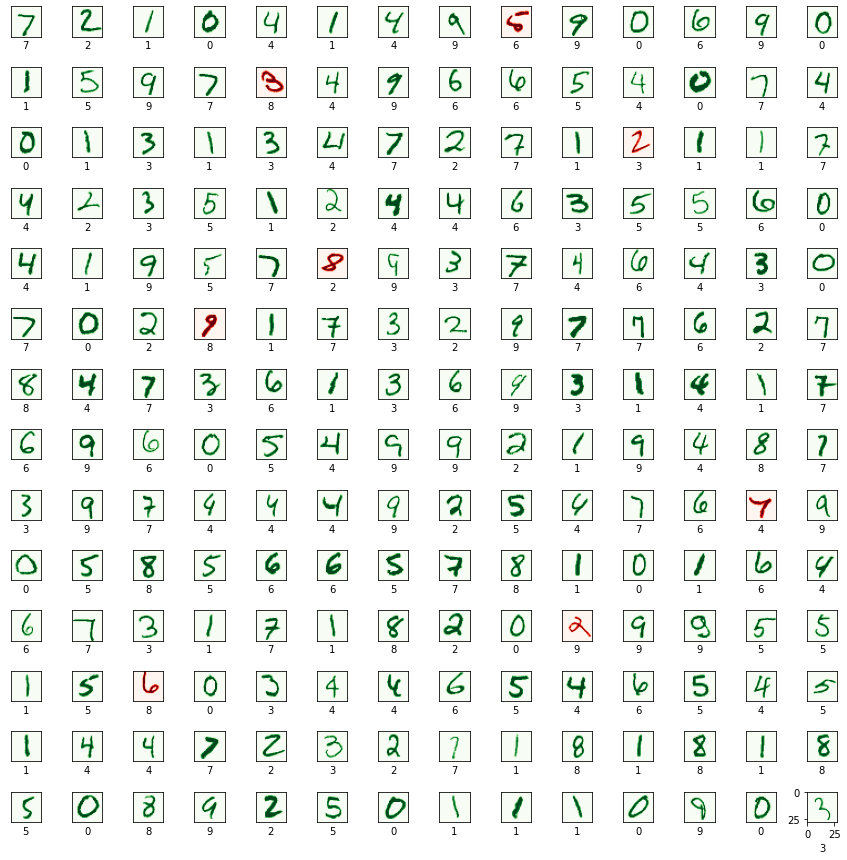

In [0]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_1[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

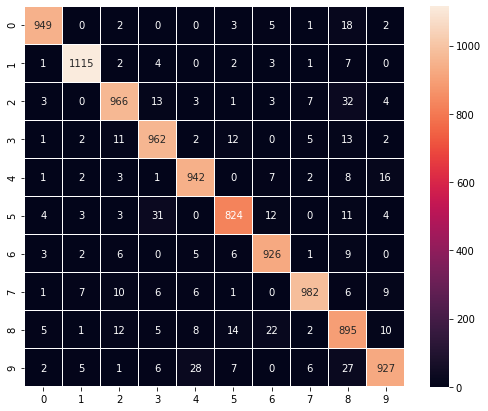

In [0]:
confusion_matrix = confusion_matrix(y_test, predictions_1)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Building a model on CNN

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
##Reshaping the data
## In order to use the convutional layers we need to reshape the input shape and add color channel to it. 
## Currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. 
## We need to reshape it to (28, 28, 1) shape so that each pixel

In [0]:
x_train_with_channels=x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_channels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [0]:
print('x_train_with_channels:', x_train_with_channels.shape)
print('x_test_with_channels:', x_test_with_channels.shape)

x_train_with_channels: (60000, 28, 28, 1)
x_test_with_channels: (10000, 28, 28, 1)


In [0]:
## Normalize the date from [0....255] to [0...1]

In [0]:
x_train_normalized = x_train_with_channels / 255
x_test_normalized = x_test_with_channels / 255

In [0]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [0]:
    inp_shape=IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS
    model = Sequential()
    model.add(Convolution2D(filters=8, kernel_size=(5, 5), padding='same', # valid
                            input_shape=inp_shape, 
                            activation='relu'))
    model.add(Convolution2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=10, activation='softmax'))

In [0]:
#Model Summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               295040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

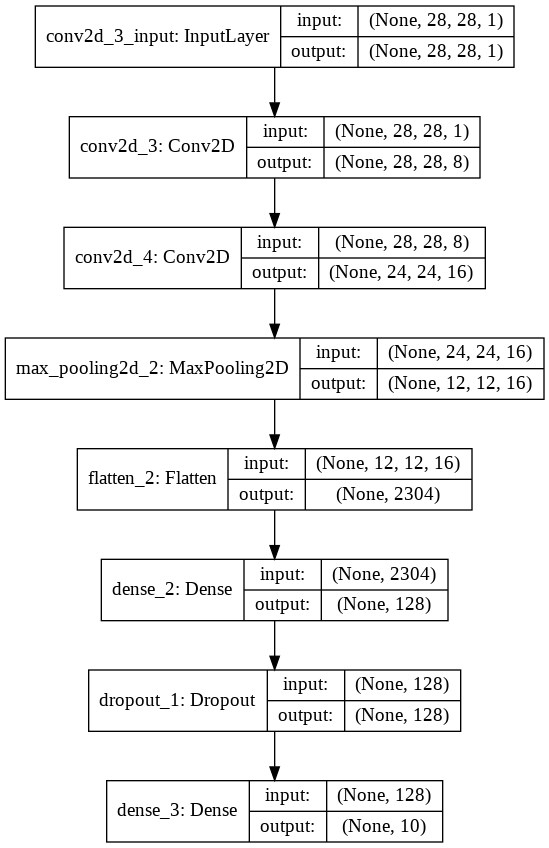

In [0]:
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)

In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])

In [0]:
## training the model
check=ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weights_only=True,
    monitor='val_acc',       ######Saving the best weights
    mode='max',
    save_best_only=True)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[check]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 791us/step - loss: 0.1710 - accuracy: 0.9473 - val_loss: 0.0465 - val_accuracy: 0.9860
Epoch 2/10
  224/60000 [..............................] - ETA: 45s - loss: 0.0662 - accuracy: 0.9777

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60000/60000 [==============================] - 47s 780us/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0414 - val_accuracy: 0.9847
Epoch 3/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0346 - val_accuracy: 0.9886
Epoch 4/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0282 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0363 - val_accuracy: 0.9894
Epoch 6/10
60000/60000 [==============================] - 46s 773us/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0338 - val_accuracy: 0.9901
Epoch 7/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0298 - val_accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 46s 772us/step - loss: 0.0158 - accuracy: 0.9947 - val_loss

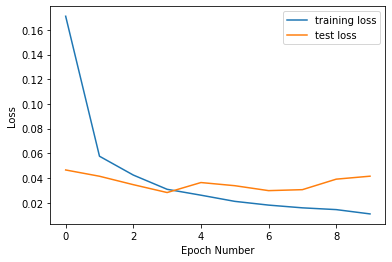

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training loss')
plt.plot(training_history.history['val_loss'], label='test loss')
plt.legend()

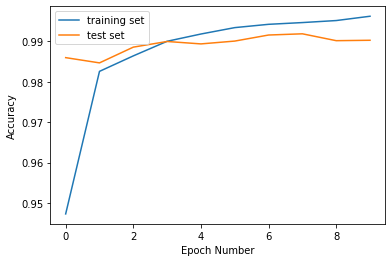

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

### Training set **accuracy**

In [0]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [0]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.002982198239577475
Training accuracy:  0.9990166425704956


### Training set **accuracy**

In [0]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [0]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04145328753209127
Validation accuracy:  0.9902999997138977


### Use the model to do predictions

In [0]:
predictions = model.predict([x_test_normalized])

In [0]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


In [0]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,5.903279e-17,3.185553e-09,1.243203e-12,1.816739e-13,1.186190e-13,7.849274e-15,1.204880e-19,1.000000e+00,1.071949e-13,6.666200e-13
1,1.985773e-12,6.334965e-12,1.000000e+00,1.723515e-21,1.592991e-17,3.835130e-24,1.632178e-12,2.848905e-18,1.914518e-18,5.250910e-23
2,5.137957e-12,1.000000e+00,7.456981e-13,9.001150e-17,1.787505e-10,1.088972e-11,8.679159e-12,4.319008e-12,3.315788e-09,1.132402e-14
3,1.000000e+00,1.384244e-14,1.759730e-12,3.333599e-14,3.515329e-16,1.671186e-14,1.966359e-08,1.153752e-10,1.444353e-13,7.936833e-11
4,8.712383e-15,3.800535e-12,2.131342e-11,2.841697e-18,9.999999e-01,2.649952e-13,1.181773e-10,4.630361e-15,1.150726e-09,6.081932e-08
...,...,...,...,...,...,...,...,...,...,...
9995,9.661979e-18,4.954620e-12,1.000000e+00,6.920044e-14,1.741048e-19,7.757163e-26,2.616590e-23,9.485042e-11,7.680521e-14,5.798077e-23
9996,1.023414e-15,4.535588e-12,5.140564e-12,9.999999e-01,8.450251e-17,7.024617e-08,1.615722e-16,1.233823e-11,2.192648e-12,2.427940e-11
9997,3.903209e-27,2.003411e-14,6.458570e-19,7.065541e-25,1.000000e+00,3.166020e-19,5.448869e-15,3.886903e-15,3.514972e-13,6.853696e-14
9998,3.849711e-14,3.210135e-15,4.826183e-20,3.333263e-13,1.424193e-18,9.999998e-01,1.844836e-11,6.700162e-19,1.824916e-07,1.629866e-16


In [0]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions_1 = np.argmax(predictions, axis=1)
pd.DataFrame(predictions_1)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [0]:
print(predictions_1[0])

7


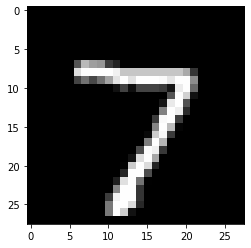

In [0]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)))
plt.gray()
plt.show()

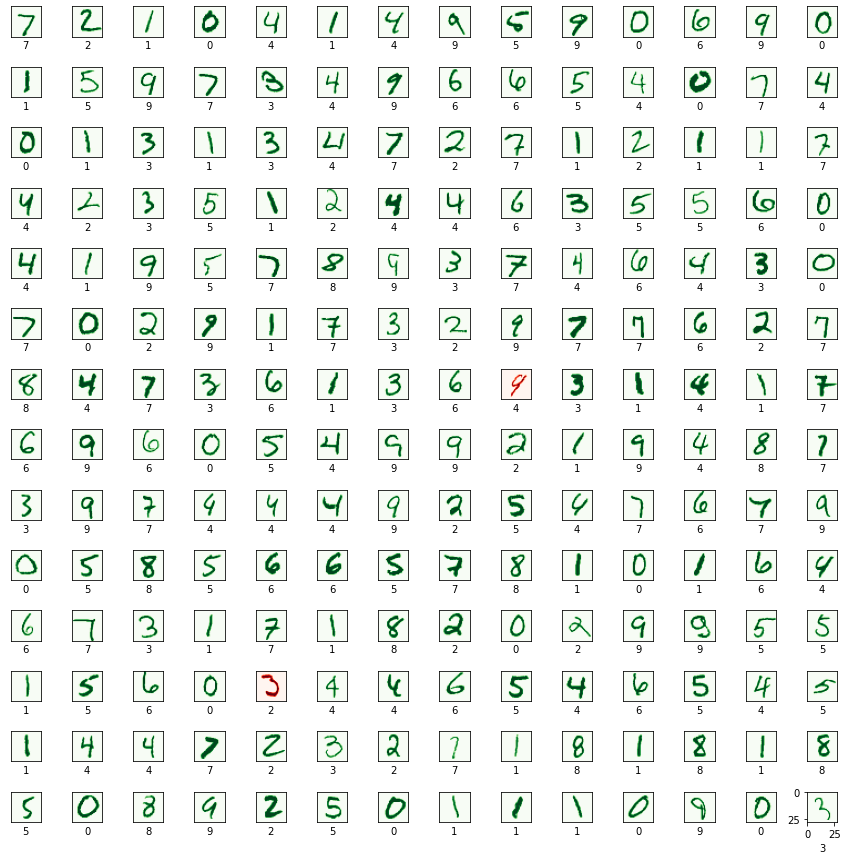

In [0]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_1[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

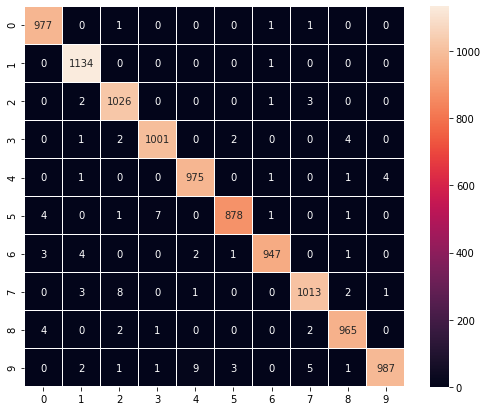

In [0]:
confusion_matrix = confusion_matrix(y_test, predictions_1)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()